<a href="https://colab.research.google.com/github/MariemBC/TP2_RN/blob/main/TP2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import time
import io 

In [2]:
upload=files.upload()

Saving Iris.csv to Iris.csv


In [3]:
#1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
data=pd.read_csv("Iris.csv")

In [4]:
#2-Afficher les 10 premières lignes du DataFrame.
print(data.head(10))


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [5]:
#3-Afficher les dimensions du dataframe.
print(data.shape)

(150, 6)


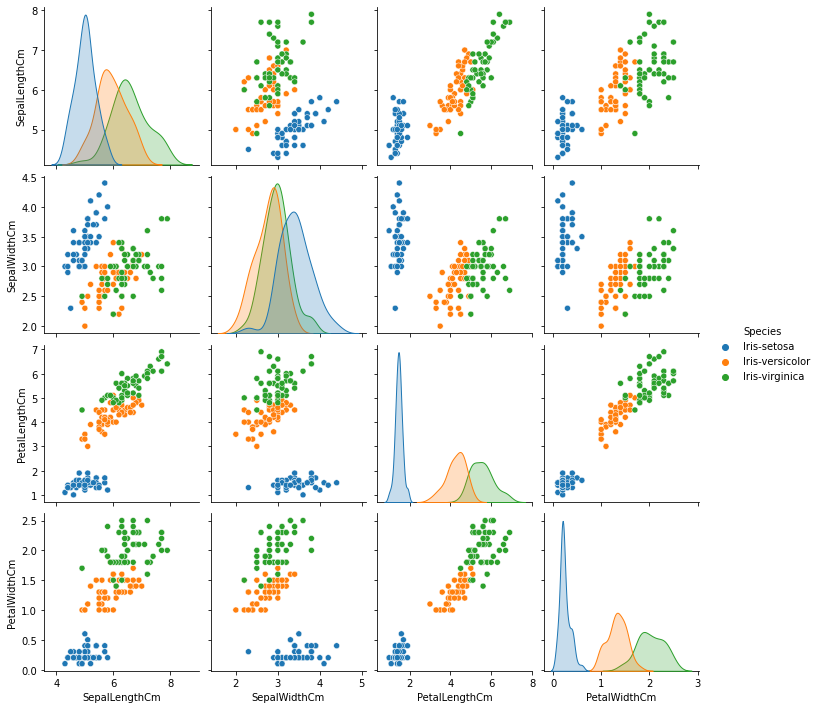

In [6]:
#4Utiliser la bibliothèque python Seaborn pour visualiser les données en
# fonction de la longueur des pétales et de largeur des sépales.

print(sns.pairplot(data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm') , hue='Species'))
plt.show()

In [7]:
#5-Ecrire un script python permettant de labelliser les différentes espèces
#d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )

target=data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
print(target.head(10))

   Species
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0


In [8]:
#6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame
#contenant les labels.

da=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df=pd.concat([da,target],axis = 1)
print(df.head(10))


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
5            5.4           3.9            1.7           0.4        0
6            4.6           3.4            1.4           0.3        0
7            5.0           3.4            1.5           0.2        0
8            4.4           2.9            1.4           0.2        0
9            4.9           3.1            1.5           0.1        0


In [9]:
#7-Écrire un script python permettant la division de dataset en des données
#d’apprentissage (70%) et des données de test (30%).

train, test =model_selection.train_test_split(df, test_size= 0.3)
trainX=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
trainY=train.Species
testX=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
testY=test.Species

In [10]:
#8-Afficher les 10 premières données d’apprentissage et celles de test.
print(trainX.head(10))

print(trainY.head(10))

print (testX.head(10))

print(testY.head(10))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
48             5.3           3.7            1.5           0.2
131            7.9           3.8            6.4           2.0
71             6.1           2.8            4.0           1.3
105            7.6           3.0            6.6           2.1
26             5.0           3.4            1.6           0.4
24             4.8           3.4            1.9           0.2
15             5.7           4.4            1.5           0.4
123            6.3           2.7            4.9           1.8
135            7.7           3.0            6.1           2.3
121            5.6           2.8            4.9           2.0
48     0
131    2
71     1
105    2
26     0
24     0
15     0
123    2
135    2
121    2
Name: Species, dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
120            6.9           3.2            5.7           2.3
137            6.4           3.1            5.5           1.8
2             

In [11]:
#9-Ecrire un script python qui utilise un perceptron multicouche pour
#l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et
#nombre maximum d’itération=150) .
%%time
clf=MLPClassifier(solver='lbfgs',alpha=1e-05, hidden_layer_sizes=(3,3),epsilon=0.07,max_iter=150)
print(clf.fit(trainX,trainY))

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')
CPU times: user 88.7 ms, sys: 0 ns, total: 88.7 ms
Wall time: 95.2 ms


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
pip install mlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mlp: filename=mlp-1.1-py3-none-any.whl size=5002 sha256=5d0f6a5a192dd7284e37ae14a5c892bd1d1caefff4fc6b28583e9bd227f80473
  Stored in directory: /root/.cache/pip/wheels/33/50/ae/016b9916f045202b77e60398a9e9849ac854a8fd36b4e87a5c
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=20dd1c8c7f7411813836d8d9ac4459462770957d602ad5889de53b173fd43c39
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built mlp sklearn


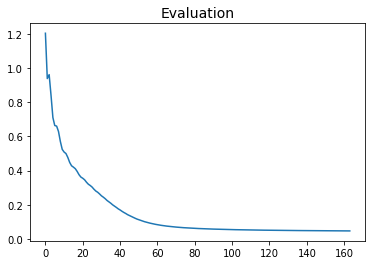

[2 2 0 0 1 2 0 2 1 2 1 2 1 1 0 2 1 2 2 1 0 1 1 1 2 1 2 0 1 0 0 0 2 2 1 0 0
 0 2 1 0 1 1 1 2]
[2 2 0 0 1 2 0 2 1 2 1 2 1 1 0 2 1 2 2 1 0 1 1 1 2 1 2 0 1 0 0 0 2 2 1 0 0
 0 2 1 0 1 1 1 2]
the accuracy is : 1.0


In [19]:
#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.
plt.plot(mlp.loss_curve_)
plt.title("Evaluation",fontsize=14)
plt.show()

prediction =clf.predict(testX)
print(prediction)
print (testY.values)

print('the accuracy is :',metrics.accuracy_score(prediction,testY))


In [14]:
pip install pretty_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 4.9 MB/s 
     |████████████████████████████████| 156 kB 66.5 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████████████████| 199 kB 86.2 MB/s 
     |████████████████████████████████| 103 kB 57.4 MB/s 
     |████████████████████████████████| 41 kB 684 kB/s 
     |████████████████████████████████| 68 kB 8.0 MB/s 
     |████████████████████████████████| 295 kB 60.8 MB/s 
     |████████████████████████████████| 965 kB 63.5 MB/s 
     |████████████████████████████████| 98 kB 9.0 MB/s 
     |████████████████████████████████| 8.8 MB 33.4 MB/s 
     |████████████████████████████████| 468 kB 62.1 MB/s 
  Attempting uninstall: tomli
    Found existing installation: tomli 2.0.1
    Uninstalling tomli-2.0.1:
      Successfully uninstalled tomli-2.0.1
  Attempting uninstall: matplotlib
    Found existing installation

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

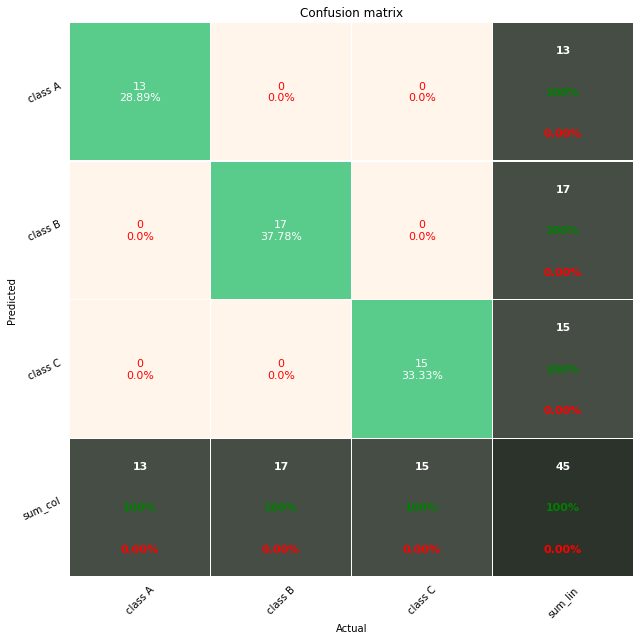

In [33]:
 from pretty_confusion_matrix import pp_matrix_from_data
 cmap='PuRd'
 pp_matrix_from_data(testY.values,prediction)

In [16]:
#13-On va ajouter le paramètre de taux d’apprentissage au niveau de
#classifieur utilisé pour une valeur égale 0.7
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },
    {
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },

]
labels= [
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]

In [17]:
mlps=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(trainX,trainY)
  mlps.append(mlp)
  print("Training set score : %f" % mlp.score(trainX,trainY))


training:constant learning-rate_0.2
Training set score : 0.352381
training:constant learning-rate_0.7
Training set score : 0.352381
training:invscaling learning-rate_0.2
Training set score : 0.980952
training:invscaling learning-rate_0.7
Training set score : 0.980952
training:adam
Training set score : 0.980952


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


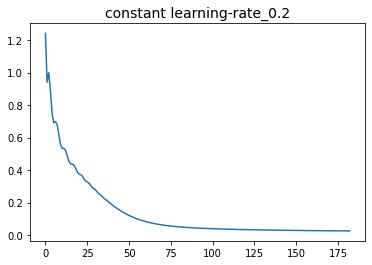

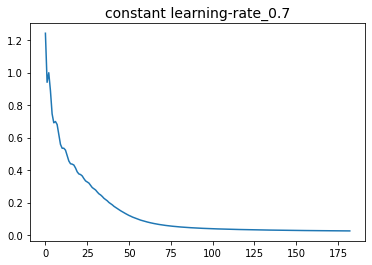

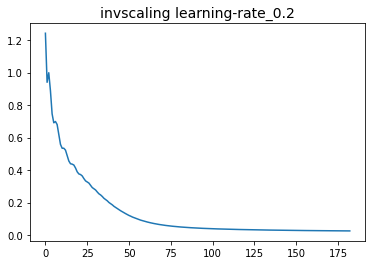

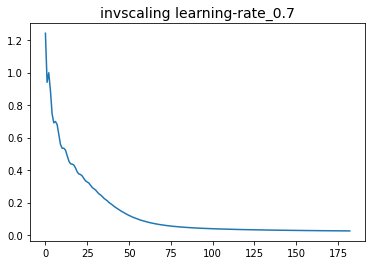

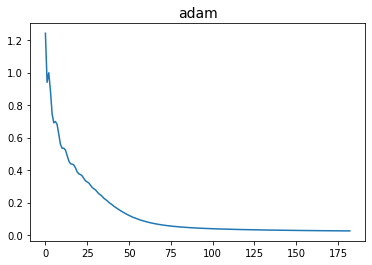

In [ ]:

for nlp, label, args in zip(mlps,labels,plot_args):
  plt.plot(mlp.loss_curve_)
  plt.title(label,fontsize=14)
  plt.show()


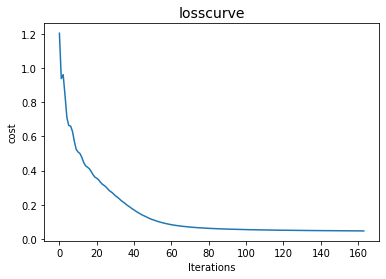

In [28]:
plt.plot(mlp.loss_curve_)
plt.title("losscurve",fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.show()

In [29]:
pip install sklearn_som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn_som.som import SOM
iris=datasets.load_iris()
iris_data=iris.data
iris_data.shape

(150, 4)

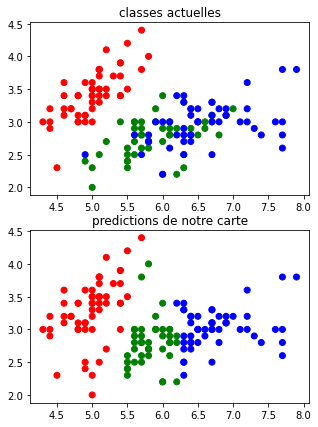

In [31]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn_som.som import SOM
iris=datasets.load_iris()
iris_data=iris.data
iris_label=iris.target
iris_data=iris_data[:,:2]
som=SOM(m=3, n=1, dim=2, random_state=1234)
som.fit(iris_data)
predictions=som.predict(iris_data)
fig,ax =plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x=iris_data[:,0]
y=iris_data[:,1]
colors=['red','green','blue']
ax[0].scatter(x,y,c=iris_label,cmap=ListedColormap(colors))
ax[0].title.set_text('classes actuelles')
ax[1].scatter(x,y,c=predictions,cmap=ListedColormap(colors))
ax[1].title.set_text('predictions de notre carte')

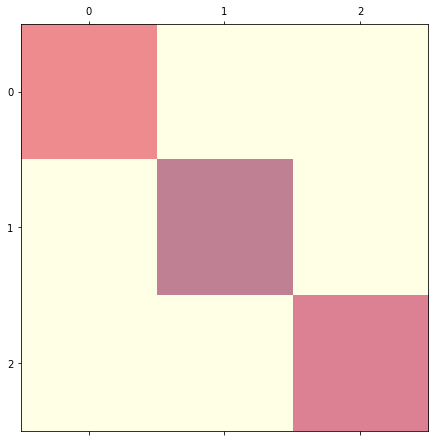

In [32]:
from sklearn.metrics import confusion_matrix
mat_con=(confusion_matrix(testY.values,prediction, labels=[0,1,2]))
fig, px=plt.subplots(figsize=(7.5,7.5))
px.matshow(mat_con,cmap=plt.cm.YlOrRd,alpha=0.5)

# Nouvelle section